In [17]:
import tweepy
import webbrowser
import time
import requests
import base64
import json
import seaborn as sns
import numpy as np
import pandas as pd

In [9]:
consumer_key = "McleIS9RlMtp6HM6a449tvgYd"
consumer_secret_key = "qzZ1vpvfftGOMkCSq0RaJyLKMg9mnJnPQdVF80eLhno4zib3ws"

In [5]:
callback_uri="oob"

In [6]:
# Authenticate url
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=VhSBjgAAAAABK3xgAAABdoi3xIA


In [10]:
key_secret = '{}:{}'.format(consumer_key, consumer_secret_key).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

In [37]:
base_url = 'https://api.twitter.com/'
auth_url = '{}oauth2/token'.format(base_url)
auth_headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}
auth_data = {
    'grant_type': 'client_credentials'
}
auth_resp = requests.post(auth_url, headers=auth_headers, data=auth_data)
print(auth_resp.status_code)
access_token = auth_resp.json()['access_token']

200


In [38]:
trend_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}

trend_params = {
    'id': 20070458,
}

trend_url = 'https://api.twitter.com/1.1/trends/place.json'  
trend_resp = requests.get(trend_url, headers=trend_headers, params=trend_params)

In [39]:
trend_resp

<Response [200]>

In [40]:
tweet_data = trend_resp.json()
print(tweet_data)

[{'trends': [{'name': '#NationalMathematicsDay', 'url': 'http://twitter.com/search?q=%23NationalMathematicsDay', 'promoted_content': None, 'query': '%23NationalMathematicsDay', 'tweet_volume': None}, {'name': '#PanchayatToParliamentBJP', 'url': 'http://twitter.com/search?q=%23PanchayatToParliamentBJP', 'promoted_content': None, 'query': '%23PanchayatToParliamentBJP', 'tweet_volume': 14998}, {'name': '#tuesdaymotivations', 'url': 'http://twitter.com/search?q=%23tuesdaymotivations', 'promoted_content': None, 'query': '%23tuesdaymotivations', 'tweet_volume': None}, {'name': '#SrinivasaRamanujan', 'url': 'http://twitter.com/search?q=%23SrinivasaRamanujan', 'promoted_content': None, 'query': '%23SrinivasaRamanujan', 'tweet_volume': None}, {'name': '#SaveTodayForFuture', 'url': 'http://twitter.com/search?q=%23SaveTodayForFuture', 'promoted_content': None, 'query': '%23SaveTodayForFuture', 'tweet_volume': 14832}, {'name': 'Legion of Merit', 'url': 'http://twitter.com/search?q=%22Legion+of+Mer

In [41]:
type(tweet_data)

list

In [42]:
len(tweet_data)

1

In [43]:
for i in range(0,10):
  print(tweet_data[0]['trends'][i])

{'name': '#NationalMathematicsDay', 'url': 'http://twitter.com/search?q=%23NationalMathematicsDay', 'promoted_content': None, 'query': '%23NationalMathematicsDay', 'tweet_volume': None}
{'name': '#PanchayatToParliamentBJP', 'url': 'http://twitter.com/search?q=%23PanchayatToParliamentBJP', 'promoted_content': None, 'query': '%23PanchayatToParliamentBJP', 'tweet_volume': 14998}
{'name': '#tuesdaymotivations', 'url': 'http://twitter.com/search?q=%23tuesdaymotivations', 'promoted_content': None, 'query': '%23tuesdaymotivations', 'tweet_volume': None}
{'name': '#SrinivasaRamanujan', 'url': 'http://twitter.com/search?q=%23SrinivasaRamanujan', 'promoted_content': None, 'query': '%23SrinivasaRamanujan', 'tweet_volume': None}
{'name': '#SaveTodayForFuture', 'url': 'http://twitter.com/search?q=%23SaveTodayForFuture', 'promoted_content': None, 'query': '%23SaveTodayForFuture', 'tweet_volume': 14832}
{'name': 'Legion of Merit', 'url': 'http://twitter.com/search?q=%22Legion+of+Merit%22', 'promoted_

In [44]:
print(type(tweet_data[0]))

<class 'dict'>


In [45]:
for key, value in tweet_data[0].items() :
    print (key)

trends
as_of
created_at
locations


In [46]:
print(tweet_data[0]['locations'])

[{'name': 'Delhi', 'woeid': 20070458}]


In [50]:
top_ten_tags=[]
for i in range(0,10):
  top_ten_tags.append(tweet_data[0]['trends'][i]['name'])
print(top_ten_tags)

['#NationalMathematicsDay', '#PanchayatToParliamentBJP', '#tuesdaymotivations', '#SrinivasaRamanujan', '#SaveTodayForFuture', 'Legion of Merit', 'lee sooman', 'राष्ट्रीय गणित', 'श्रीनिवास रामानुजन', 'US President']


In [71]:
master_hash=top_ten_tags[0][1:]
print(master_hash)

NationalMathematicsDay


In [73]:
trend_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}
'''A UTF-8, URL-encoded search query of 500 characters maximum, 
    including operators. Queries may additionally be limited by complexity.'''
trend_params = {
    
    'q': "%23"+master_hash,
}

trend_url = 'https://api.twitter.com/1.1/search/tweets.json'  
trend_resp = requests.get(trend_url, headers=trend_headers, params=trend_params)

In [75]:
tweets=trend_resp.json()

In [76]:
#print(tweets)

{'statuses': [{'created_at': 'Tue Dec 22 05:53:20 +0000 2020', 'id': 1341260511493517313, 'id_str': '1341260511493517313', 'text': 'RT @ieeducation_job: On #NationalMathematicsDay, list of #scholarship for students who wish to study math \n\nhttps://t.co/vBDvreKK8O', 'truncated': False, 'entities': {'hashtags': [{'text': 'NationalMathematicsDay', 'indices': [24, 47]}, {'text': 'scholarship', 'indices': [57, 69]}], 'symbols': [], 'user_mentions': [{'screen_name': 'ieeducation_job', 'name': 'IE Education Jobs', 'id': 1067361803573841921, 'id_str': '1067361803573841921', 'indices': [3, 19]}], 'urls': [{'url': 'https://t.co/vBDvreKK8O', 'expanded_url': 'https://indianexpress.com/article/education/on-national-mathematics-day-list-of-scholarship-fellowship-programme-available-for-students-7113906/', 'display_url': 'indianexpress.com/article/educat…', 'indices': [108, 131]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel

In [74]:
print(trend_params)

{'q': '%23NationalMathematicsDay'}


In [77]:
print(type(tweets))

<class 'dict'>


In [78]:
for key, value in tweets.items() :
    print (key)

statuses
search_metadata


In [79]:
tweets['search_metadata']

{'completed_in': 0.077,
 'max_id': 1341260511493517313,
 'max_id_str': '1341260511493517313',
 'next_results': '?max_id=1341260468946690047&q=%2523NationalMathematicsDay&include_entities=1',
 'query': '%2523NationalMathematicsDay',
 'refresh_url': '?since_id=1341260511493517313&q=%2523NationalMathematicsDay&include_entities=1',
 'count': 15,
 'since_id': 0,
 'since_id_str': '0'}

In [81]:
type(tweets['statuses'])

list

In [82]:
len(tweets['statuses'])

15

In [83]:
tweets['statuses'][0]

{'created_at': 'Tue Dec 22 05:53:20 +0000 2020',
 'id': 1341260511493517313,
 'id_str': '1341260511493517313',
 'text': 'RT @ieeducation_job: On #NationalMathematicsDay, list of #scholarship for students who wish to study math \n\nhttps://t.co/vBDvreKK8O',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'NationalMathematicsDay',
    'indices': [24, 47]},
   {'text': 'scholarship', 'indices': [57, 69]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'ieeducation_job',
    'name': 'IE Education Jobs',
    'id': 1067361803573841921,
    'id_str': '1067361803573841921',
    'indices': [3, 19]}],
  'urls': [{'url': 'https://t.co/vBDvreKK8O',
    'expanded_url': 'https://indianexpress.com/article/education/on-national-mathematics-day-list-of-scholarship-fellowship-programme-available-for-students-7113906/',
    'display_url': 'indianexpress.com/article/educat…',
    'indices': [108, 131]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a hre

CHecking the keys present in dict of a single tweet

## Converting list of dicts to a dataframe
https://stackoverflow.com/q/20638006/6427607

In [88]:
df = pd.DataFrame(tweets['statuses'])

In [90]:
pd.set_option('display.max_columns', None)
df

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang
0,Tue Dec 22 05:53:20 +0000 2020,1341260511493517313,1341260511493517313,RT @ieeducation_job: On #NationalMathematicsDa...,False,{'hashtags': [{'text': 'NationalMathematicsDay...,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 1313426783757189125, 'id_str': '1313426...",None,None,None,None,{'created_at': 'Tue Dec 22 05:31:22 +0000 2020...,False,6,0,False,False,False,en
1,Tue Dec 22 05:53:17 +0000 2020,1341260502991695874,1341260502991695874,"RT @AmitAgarwal: It's #NationalMathematicsDay,...",False,{'hashtags': [{'text': 'NationalMathematicsDay...,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,None,None,"{'id': 3276476922, 'id_str': '3276476922', 'na...",None,None,None,None,{'created_at': 'Tue Dec 22 05:48:20 +0000 2020...,False,2,0,False,False,NaN,en
2,Tue Dec 22 05:53:14 +0000 2020,1341260489930715136,1341260489930715136,RT @SadhguruJV: Mathematics did not get invent...,False,"{'hashtags': [{'text': 'SadhguruQuotes', 'indi...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 1163437429543411713, 'id_str': '1163437...",None,None,None,None,{'created_at': 'Tue Dec 22 02:45:00 +0000 2020...,False,2554,0,False,False,NaN,en
3,Tue Dec 22 05:53:14 +0000 2020,1341260488697470977,1341260488697470977,RT @dineshjoshilax: महान गणितज्ञ #SrinivasaRam...,False,"{'hashtags': [{'text': 'SrinivasaRamanujan', '...","{'iso_language_code': 'hi', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,"{'id': 844852568580796419, 'id_str': '84485256...",None,None,None,None,{'created_at': 'Tue Dec 22 03:34:52 +0000 2020...,False,1,0,False,False,NaN,hi
4,Tue Dec 22 05:53:13 +0000 2020,1341260483366539266,1341260483366539266,RT @indutiwarijbp: विश्लेषण एवं संख्या सिद्धां...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'hi', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,"{'id': 1036118700640722944, 'id_str': '1036118...",None,None,None,None,{'created_at': 'Tue Dec 22 05:31:22 +0000 2020...,False,3,0,False,False,NaN,hi
5,Tue Dec 22 05:53:11 +0000 2020,1341260477821669378,1341260477821669378,RT @punia_tanuj: विश्लेषण एवं संख्या सिद्धांत ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'hi', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 1321724868870565888, 'id_str': '1321724...",None,None,None,None,{'created_at': 'Tue Dec 22 02:35:23 +0000 2020...,False,9,0,False,False,NaN,hi
6,Tue Dec 22 05:53:11 +0000 2020,1341260476622065664,1341260476622065664,RT @dinesh_ve: An equation means nothing to me...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,"{'id': 1296848057443573760, 'id_str': '1296848...",None,None,None,None,{'created_at': 'Tue Dec 22 05:07:18 +0000 2020...,False,4,0,False,False,NaN,en
7,Tue Dec 22 05:53:11 +0000 2020,1341260475514818560,1341260475514818560,RT @NTPatel1999: Born on this day in the year ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,"{'id': 838409346547593216, 'id_str': '83840934...",None,None,None,None,{'created_at': 'Mon Dec 21 18:33:59 +0000 202

# Extracting tweets

In [137]:
def get_tweets_since(url_given):
    trend_headers = {
        'Authorization': 'Bearer {}'.format(access_token)    
    }
    '''A UTF-8, URL-encoded search query of 500 characters maximum, 
        including operators. Queries may additionally be limited by complexity.'''
    trend_params = {

        'q': "%23"+master_hash,
        'count': 100,
        'min_id':0
    }
    if url_given==-1:
        trend_url = 'https://api.twitter.com/1.1/search/tweets.json'  
        trend_resp = requests.get(trend_url, headers=trend_headers, params=trend_params)
    else:
        trend_url='https://api.twitter.com/1.1/search/tweets.json'+url_given
        trend_resp = requests.get(trend_url, headers=trend_headers, params=trend_params)
        

    tweets=trend_resp.json()
    #return tweets['statuses'],tweets['search_metadata']["max_id"]
    return tweets

In [138]:
tweets_list=[]
give_url=-1
for i in range(0,105):
    tweets_obj=get_tweets_since(give_url)
    #print(type(tweets_obj))
    #print(tweets_obj)
    tmp_list=tweets_obj['statuses']
    #print(now_min_id)
    #now_min_id=tweets_obj['search_metadata']["max_id"]+1
    print('Netx res',tweets_obj['search_metadata']["next_results"])
    give_url=tweets_obj['search_metadata']["next_results"]
    tweets_list.extend(tmp_list)
    print("len of master list now is",len(tweets_list))
    print(tweets_obj['search_metadata']["max_id"])
    print('len of tmp_list is ',len(tmp_list))
    print("id of first tweet in current stint is ",tmp_list[0]['id'])
    #for j in tmp_list:
        #print(j['id'])
   
    print("-------------------------------------------------------------------------------------")

Netx res ?max_id=1341289202781020162&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 100
1341289965087379457
len of tmp_list is  100
id of first tweet in current stint is  1341289965087379457
-------------------------------------------------------------------------------------
Netx res ?max_id=1341288596234358784&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 200
1341289202781020162
len of tmp_list is  100
id of first tweet in current stint is  1341289195898167296
-------------------------------------------------------------------------------------
Netx res ?max_id=1341287878740029439&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 300
1341288596234358784
len of tmp_list is  100
id of first tweet in current stint is  1341288593168486401
-------------------------------------------------------------------------------------
Netx res ?max_id=1341287180103077889&q=%2523NationalMat

Netx res ?max_id=1341274137809973247&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 2700
1341274679823060992
len of tmp_list is  100
id of first tweet in current stint is  1341274676547313664
-------------------------------------------------------------------------------------
Netx res ?max_id=1341273628474658818&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 2800
1341274137809973247
len of tmp_list is  100
id of first tweet in current stint is  1341274132571275264
-------------------------------------------------------------------------------------
Netx res ?max_id=1341273094590091263&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 2900
1341273628474658818
len of tmp_list is  100
id of first tweet in current stint is  1341273601308168195
-------------------------------------------------------------------------------------
Netx res ?max_id=1341272591885996031&q=%2523National

Netx res ?max_id=1341261496366469120&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 5300
1341261965692461056
len of tmp_list is  100
id of first tweet in current stint is  1341261960722059266
-------------------------------------------------------------------------------------
Netx res ?max_id=1341261042324656127&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 5400
1341261496366469120
len of tmp_list is  100
id of first tweet in current stint is  1341261488929968128
-------------------------------------------------------------------------------------
Netx res ?max_id=1341260548365676545&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 5500
1341261042324656127
len of tmp_list is  100
id of first tweet in current stint is  1341261039883542529
-------------------------------------------------------------------------------------
Netx res ?max_id=1341260135679737856&q=%2523National

Netx res ?max_id=1341250732457017344&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 7900
1341251096451239937
len of tmp_list is  100
id of first tweet in current stint is  1341251096262496256
-------------------------------------------------------------------------------------
Netx res ?max_id=1341250396870696962&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 8000
1341250732457017344
len of tmp_list is  100
id of first tweet in current stint is  1341250727943933953
-------------------------------------------------------------------------------------
Netx res ?max_id=1341250010533351424&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 8100
1341250396870696962
len of tmp_list is  100
id of first tweet in current stint is  1341250396455485440
-------------------------------------------------------------------------------------
Netx res ?max_id=1341249635256422400&q=%2523National

Netx res ?max_id=1341241078561685503&q=%2523NationalMathematicsDay&count=100&include_entities=1
len of master list now is 10500
1341241366328844287
len of tmp_list is  100
id of first tweet in current stint is  1341241355100557313
-------------------------------------------------------------------------------------


In [117]:
len(tweets_list)

100

## Storing the 105k tweets as JSON

In [139]:
tweets_dict={
    "tweets_extracted":tweets_list
}

In [144]:
with open("sample.json", "w") as outfile:  
    json.dump(tweets_dict, outfile,indent=4)

In [7]:
import json 
  
with open('sample.json') as json_file: 
    tweets_dict = json.load(json_file) 
tweets_list=tweets_dict["tweets_extracted"]

## Involving useful columns in a dataframe
Link describing the field meanings: https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

In [64]:
i=0
print(tweets_list[i]["id"])

# The actual UTF-8 text of the status update.
print(tweets_list[i]["text"])

# Name of the user
print(tweets_list[i]["user"]["name"])
print(tweets_list[i]["user"]["followers_count"])
print(tweets_list[i]["user"]["friends_count"])
print(tweets_list[i]['user']["verified"])


#Number of times this Tweet has been retweeted. 
print(tweets_list[i]["retweet_count"])
print(tweets_list[i]["favorite_count"])
print(tweets_list[i]["lang"])

# Entities
print(tweets_list[i]["entities"])
print(tweets_list[i]["entities"]["hashtags"])
print(tweets_list[i]["entities"]["urls"])
#print(tweets_list[i]["entities"]["media"])


1341289965087379457
Remembering the Legendary Mathematician, #SrinivasaRamanujan on his birth anniversary, which is also celebrated as… https://t.co/yBFxhF8Iio
Sujeet Kumar
3670
340
True
0
0
en
{'hashtags': [{'text': 'SrinivasaRamanujan', 'indices': [41, 60]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yBFxhF8Iio', 'expanded_url': 'https://twitter.com/i/web/status/1341289965087379457', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}
[{'text': 'SrinivasaRamanujan', 'indices': [41, 60]}]
[{'url': 'https://t.co/yBFxhF8Iio', 'expanded_url': 'https://twitter.com/i/web/status/1341289965087379457', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]


## Selecting useful fields and other processing

In [65]:
mod_list=[]
cnt=0
user_id_list=[]
extra_hashtags_list=[]
text_str=""
user_map={}
for a_tweet in tweets_list:
    tmp_d={}
    #tmp_d["id"]=a_tweet["id"]
    tmp_d["user_name"]=a_tweet["user"]["name"]
    tmp_d["num_retweets"]=a_tweet["retweet_count"]
    tmp_d["num_likes"]=a_tweet["favorite_count"]
    tmp_d["lang"]=a_tweet["lang"]
    tmp_d["num_user_followers"]=a_tweet["user"]["followers_count"]
    tmp_d["num_user_friends"]=a_tweet["user"]["friends_count"]
    tmp_d["num_ext_hashtags"]=0
    tmp_d["num_ext_urls"]=0
    tmp_d["num_ext_media"]=0
    tmp_d['text']=a_tweet['text']
    text_str=text_str+"\n\n"+tmp_d['text']
    if a_tweet["user"]["verified"]==True:
        tmp_d["is_verified"]="verified"
    else:
        tmp_d["is_verified"]="not_verified"
        
    if "hashtags" in a_tweet["entities"].keys():
        tmp_d["num_ext_hashtags"]=len(a_tweet["entities"]["hashtags"])
        for x in a_tweet["entities"]["hashtags"]:
            extra_hashtags_list.append(x['text'])
    if "urls" in a_tweet["entities"].keys():
        tmp_d["num_ext_urls"]=len(a_tweet["entities"]["urls"])
    if "media" in a_tweet["entities"].keys():
        tmp_d["num_ext_media"]=len(a_tweet["entities"]["media"]) 
    if "coordinates" in a_tweet.keys() and a_tweet["coordinates"]!=None:
        #print(a_tweet.keys())
        #print(a_tweet["coordinates"]["coordinates"])        
        tmp_d["longitude"]=a_tweet["coordinates"]["coordinates"][0]
        tmp_d["latitude"]=a_tweet["coordinates"]["coordinates"][1]
        cnt+=1
    elif a_tweet["place"]!=None:
        #print(a_tweet["place"]["bounding_box"]["coordinates"][0][0])
        tmp_d["longitude"]=a_tweet["place"]["bounding_box"]["coordinates"][0][0][0]
        tmp_d["latitude"]=a_tweet["place"]["bounding_box"]["coordinates"][0][0][1]
        cnt+=1
    mod_list.append(tmp_d)
    user_id_list.append(a_tweet["user"]["id"])
    user_map[a_tweet["user"]["id"]]=a_tweet["user"]["name"]
    
    #print(tmp_d)
    #break

In [66]:
print(len(mod_list))

10500


In [67]:
print(len(extra_hashtags_list))

10286


In [68]:
df = pd.DataFrame(mod_list)

# Analysis

In [70]:
df.columns

Index(['user_name', 'num_retweets', 'num_likes', 'lang', 'num_user_followers',
       'num_user_friends', 'num_ext_hashtags', 'num_ext_urls', 'num_ext_media',
       'text', 'is_verified', 'longitude', 'latitude'],
      dtype='object')

In [71]:
df.dtypes

user_name              object
num_retweets            int64
num_likes               int64
lang                   object
num_user_followers      int64
num_user_friends        int64
num_ext_hashtags        int64
num_ext_urls            int64
num_ext_media           int64
text                   object
is_verified            object
longitude             float64
latitude              float64
dtype: object

In [73]:
df.describe()

,num_retweets,num_likes,num_user_followers,num_user_friends,num_ext_hashtags,num_ext_urls,num_ext_media,longitude,latitude
count,10500.000000,10500.000000,1.050000e+04,10500.000000,10500.000000,10500.000000,10500.000000,123.000000,123.000000
mean,655.819238,1.168095,5.808436e+03,634.710095,0.979619,0.204762,0.113143,74.592504,22.917072
std,1282.876843,10.243694,1.201445e+05,1930.947001,1.070771,0.418380,0.316782,20.845186,5.699447
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-84.820309,6.622513
25%,1.000000,0.000000,1.900000e+01,40.000000,0.000000,0.000000,0.000000,72.744840,20.080191
50%,13.000000,0.000000,1.010000e+02,155.000000,1.000000,0.000000,0.000000,77.000000,23.005830
75%,205.000000,0.000000,5.362500e+02,548.250000,1.000000,0.000000,0.000000,80.214405,25.852856
max,3456.000000,670.000000,7.846488e+06,82600.000000,10.000000,3.000000,1.000000,92.325090,44.160540


In [76]:
df.corr()

,num_retweets,num_likes,num_user_followers,num_user_friends,num_ext_hashtags,num_ext_urls,num_ext_media,longitude,latitude
num_retweets,1.000000,-0.056754,-0.022421,-0.113248,0.025426,-0.249602,-0.176193,0.013351,0.084552
num_likes,-0.056754,1.000000,0.214843,-0.003896,-0.020572,0.154204,0.017473,-0.175504,0.057008
num_user_followers,-0.022421,0.214843,1.000000,0.022322,-0.005334,0.065918,-0.009840,-0.001794,-0.031984
num_user_friends,-0.113248,-0.003896,0.022322,1.000000,-0.056368,-0.025254,0.042014,0.090867,-0.124947
num_ext_hashtags,0.025426,-0.020572,-0.005334,-0.056368,1.000000,0.016120,0.203638,0.002644,-0.128955
num_ext_urls,-0.249602,0.154204,0.065918,-0.025254,0.016120,1.000000,-0.171225,-0.012629,0.054210
num_ext_media,-0.176193,0.017473,-0.009840,0.042014,0.203638,-0.171225,1.000000,0.012049,-0.097763
longitude,0.013351,-0.175504,-0.001794,0.090867,0.002644,-0.012629,0.012049,1.000000,-0.318445
latitude,0.084552,0.057008,-0.031984,-0.124947,-0.128955,0.054210,-0.097763,-0.318445,1.000000


In [77]:
for i in df.columns:
    print("Number of unique values for {} is {}".format(i,len(df[i].unique())))

Number of unique values for user_name is 8094
Number of unique values for num_retweets is 94
Number of unique values for num_likes is 74
Number of unique values for lang is 23
Number of unique values for num_user_followers is 2219
Number of unique values for num_user_friends is 1910
Number of unique values for num_ext_hashtags is 11
Number of unique values for num_ext_urls is 4
Number of unique values for num_ext_media is 2
Number of unique values for text is 4029
Number of unique values for is_verified is 2
Number of unique values for longitude is 84
Number of unique values for latitude is 84


# On magnifying, one can see that tweets related to National Mathematics Day were received from all over India (notice the red dots)

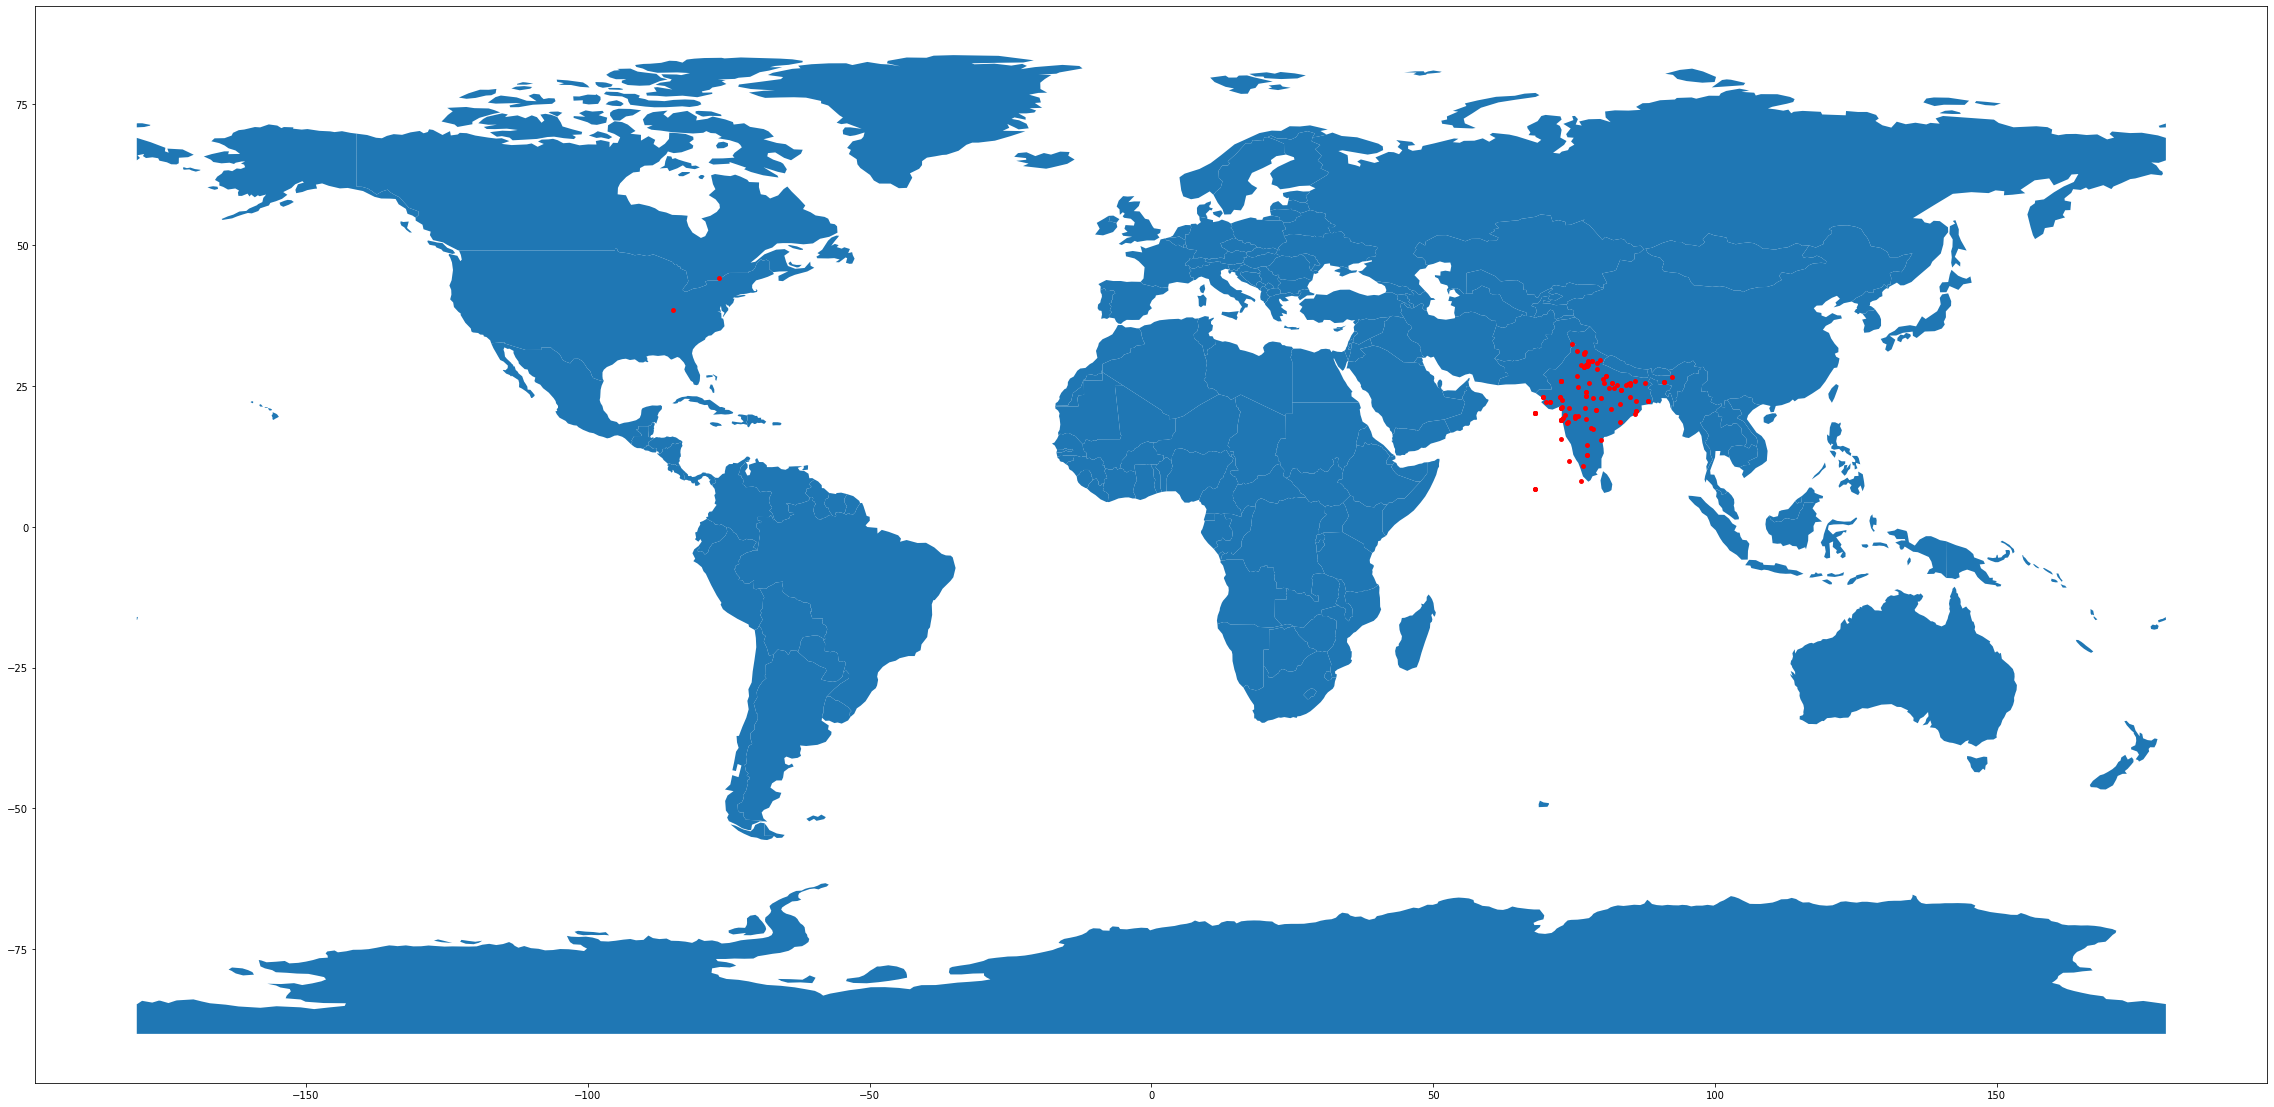

In [94]:
import matplotlib.pyplot as plt
#plt.scatter(x=df['longitude'], y=df['latitude'])
#plt.show()

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(40, 30)), marker='o', color='red', markersize=15);

## Do we get some useful correlations in the numerical fields ?

In [80]:
df.corr()

,num_retweets,num_likes,num_user_followers,num_user_friends,num_ext_hashtags,num_ext_urls,num_ext_media,longitude,latitude
num_retweets,1.000000,-0.056754,-0.022421,-0.113248,0.025426,-0.249602,-0.176193,0.013351,0.084552
num_likes,-0.056754,1.000000,0.214843,-0.003896,-0.020572,0.154204,0.017473,-0.175504,0.057008
num_user_followers,-0.022421,0.214843,1.000000,0.022322,-0.005334,0.065918,-0.009840,-0.001794,-0.031984
num_user_friends,-0.113248,-0.003896,0.022322,1.000000,-0.056368,-0.025254,0.042014,0.090867,-0.124947
num_ext_hashtags,0.025426,-0.020572,-0.005334,-0.056368,1.000000,0.016120,0.203638,0.002644,-0.128955
num_ext_urls,-0.249602,0.154204,0.065918,-0.025254,0.016120,1.000000,-0.171225,-0.012629,0.054210
num_ext_media,-0.176193,0.017473,-0.009840,0.042014,0.203638,-0.171225,1.000000,0.012049,-0.097763
longitude,0.013351,-0.175504,-0.001794,0.090867,0.002644,-0.012629,0.012049,1.000000,-0.318445
latitude,0.084552,0.057008,-0.031984,-0.124947,-0.128955,0.054210,-0.097763,-0.318445,1.000000


### Seeing the number of unique values

In [81]:
for i in df.columns:
    print("Number of unique values for {} is {}".format(i,len(df[i].unique())))

Number of unique values for user_name is 8094
Number of unique values for num_retweets is 94
Number of unique values for num_likes is 74
Number of unique values for lang is 23
Number of unique values for num_user_followers is 2219
Number of unique values for num_user_friends is 1910
Number of unique values for num_ext_hashtags is 11
Number of unique values for num_ext_urls is 4
Number of unique values for num_ext_media is 2
Number of unique values for text is 4029
Number of unique values for is_verified is 2
Number of unique values for longitude is 84
Number of unique values for latitude is 84
Number of unique values for geometry is 84


### A brief overview of dataset

In [82]:
df.describe()

,num_retweets,num_likes,num_user_followers,num_user_friends,num_ext_hashtags,num_ext_urls,num_ext_media,longitude,latitude
count,10500.000000,10500.000000,1.050000e+04,10500.000000,10500.000000,10500.000000,10500.000000,123.000000,123.000000
mean,655.819238,1.168095,5.808436e+03,634.710095,0.979619,0.204762,0.113143,74.592504,22.917072
std,1282.876843,10.243694,1.201445e+05,1930.947001,1.070771,0.418380,0.316782,20.845186,5.699447
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-84.820309,6.622513
25%,1.000000,0.000000,1.900000e+01,40.000000,0.000000,0.000000,0.000000,72.744840,20.080191
50%,13.000000,0.000000,1.010000e+02,155.000000,1.000000,0.000000,0.000000,77.000000,23.005830
75%,205.000000,0.000000,5.362500e+02,548.250000,1.000000,0.000000,0.000000,80.214405,25.852856
max,3456.000000,670.000000,7.846488e+06,82600.000000,10.000000,3.000000,1.000000,92.325090,44.160540


# Verified users vs non-verified users
### While the ratio of non-verified to verified users is quite large, I believe that this ratio is much higher than a general case. This seems to happen as an occassion like the 'National Mathematics Day' recieves tweets from politicians, MLAs,govt. officials etc across the country (more so than let's say a hastag of #IndiaVSAus")

In [122]:
df["is_verified"].value_counts()

not_verified    10309
verified          191
Name: is_verified, dtype: int64

Text(0.5, 1.0, 'Number of appearances in dataset')

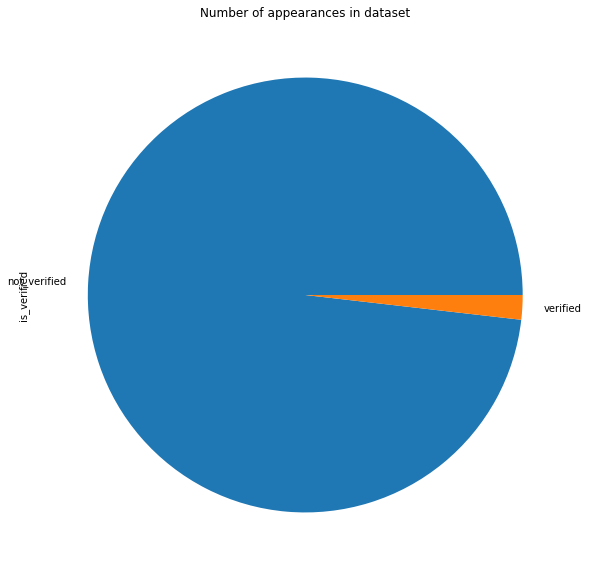

In [121]:
fig = plt.figure(figsize=(10,10))
df.is_verified.value_counts().plot(kind='pie')
plt.title('Number of appearances in dataset')

# Hashtags

Most tweets had 0-1 hashtags.

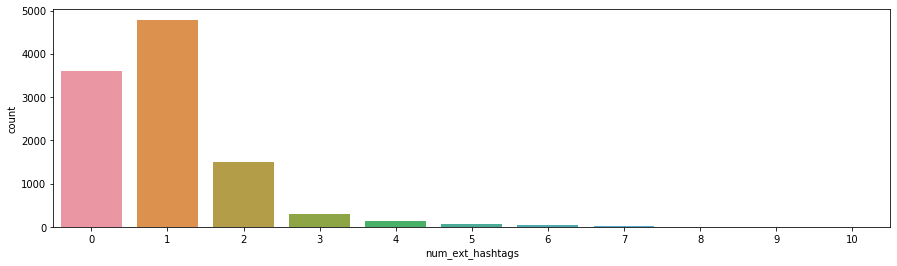

In [83]:
#The purpose of using plt.figure() is to create a figure object.
fig = plt.figure(figsize=(15,4))
sns.countplot(x="num_ext_hashtags", data=df)

In [85]:
def generate_word_cloud(arr):
    d={}
    import os

    from wordcloud import WordCloud
    for i in arr:
        if i in d.keys():
            d[i]+=1
        else:
            d[i]=1
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Wordcloud based on hashtags

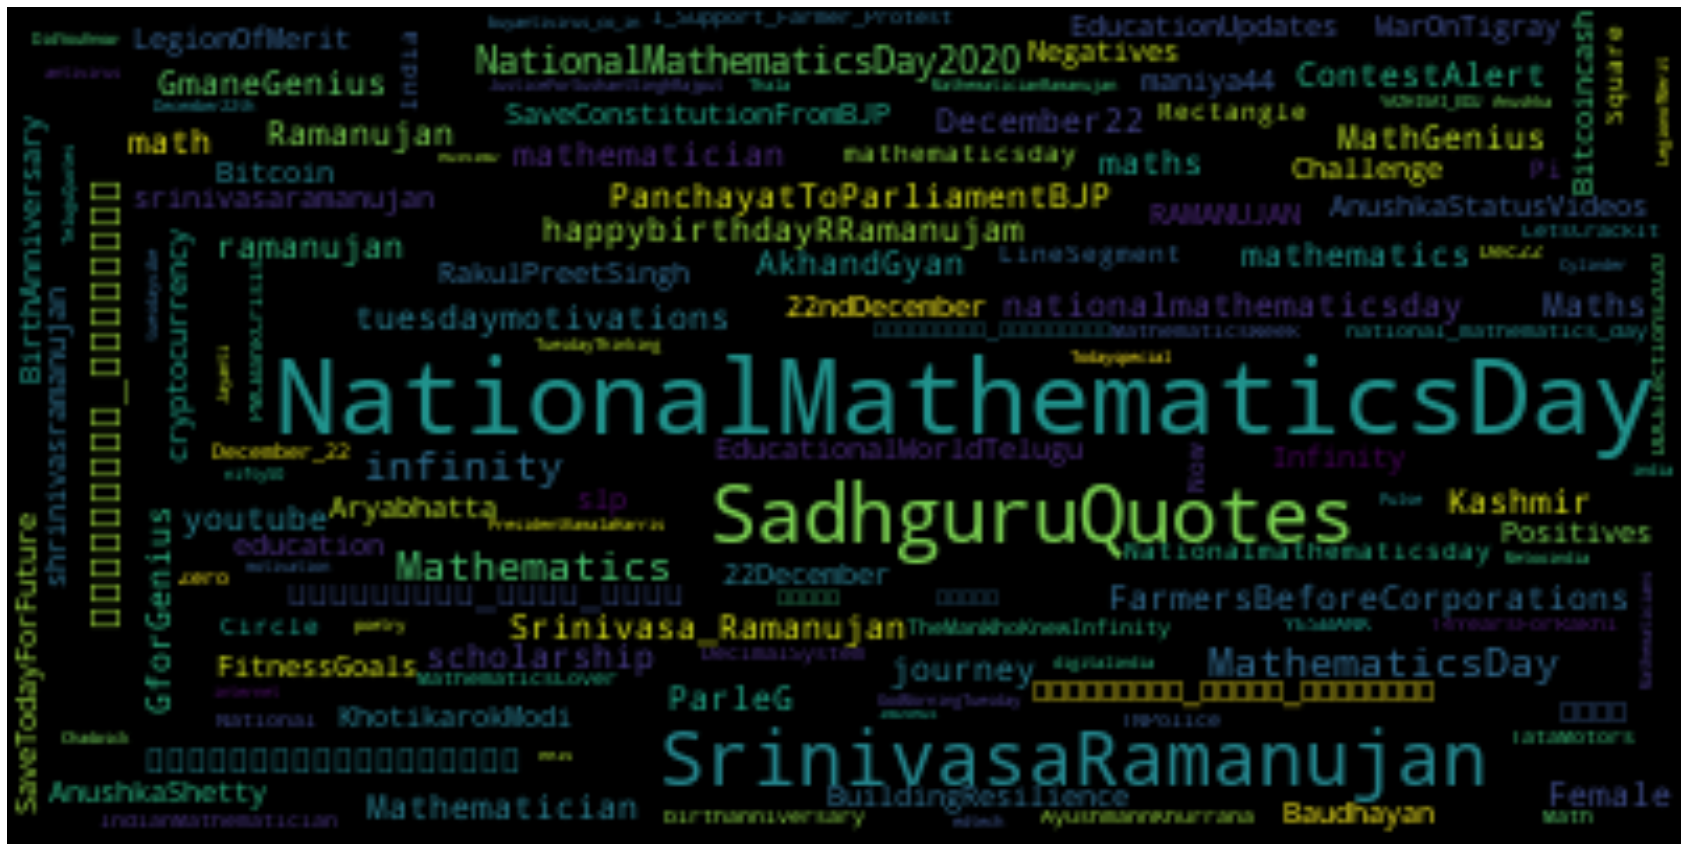

In [86]:
generate_word_cloud(extra_hashtags_list)

# Wordcloud based on text of tweets

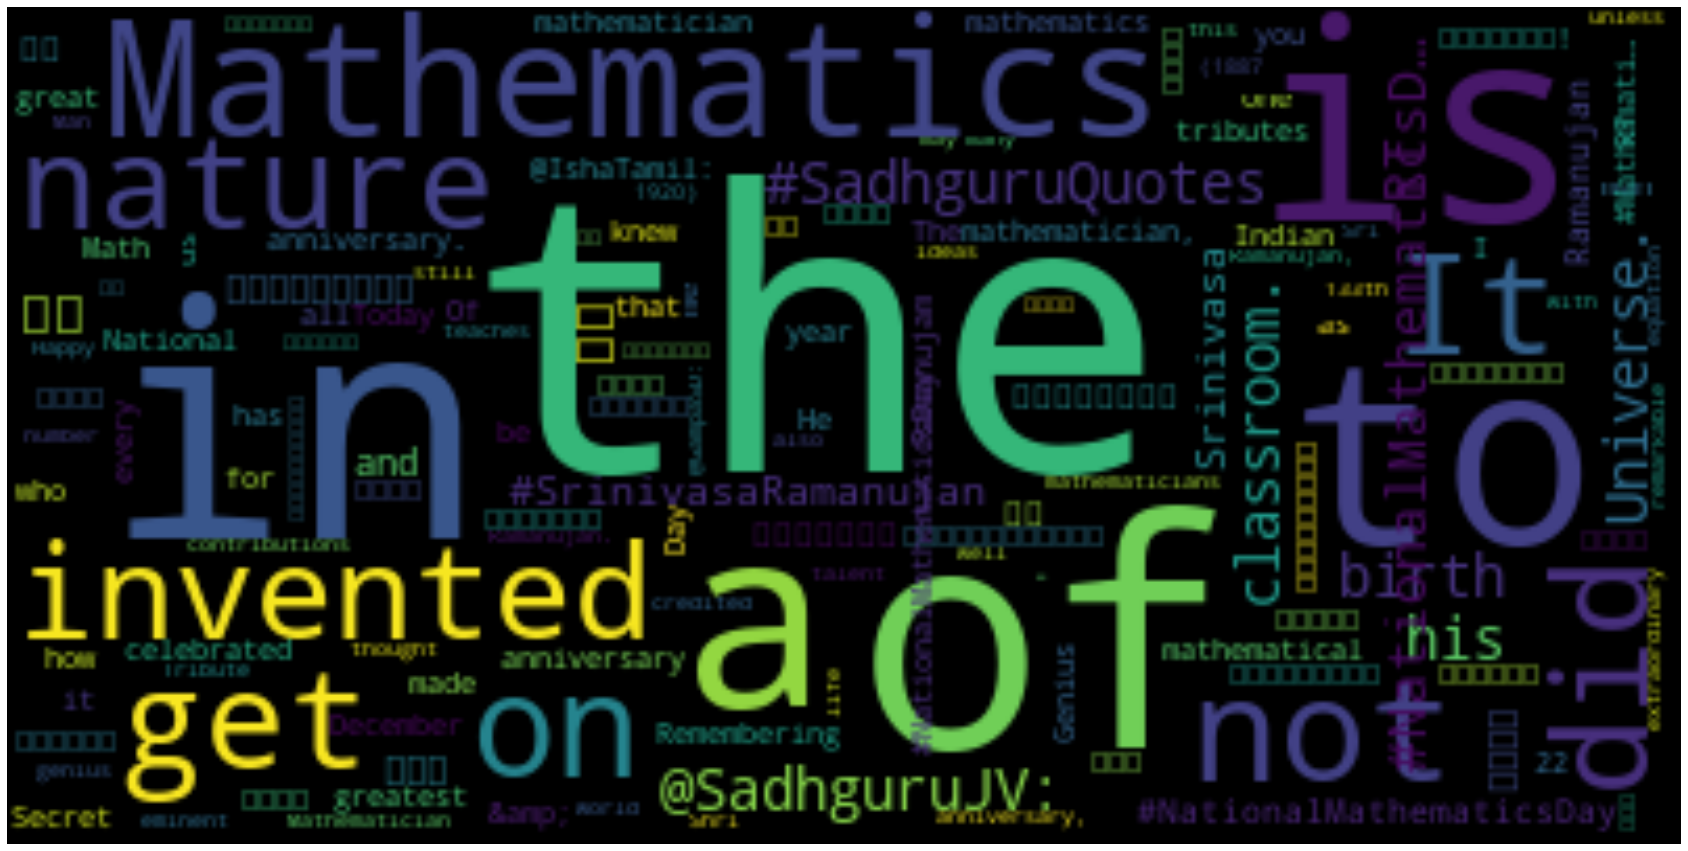

In [93]:
generate_word_cloud(text_str.split(' '))

# Number of followers trend

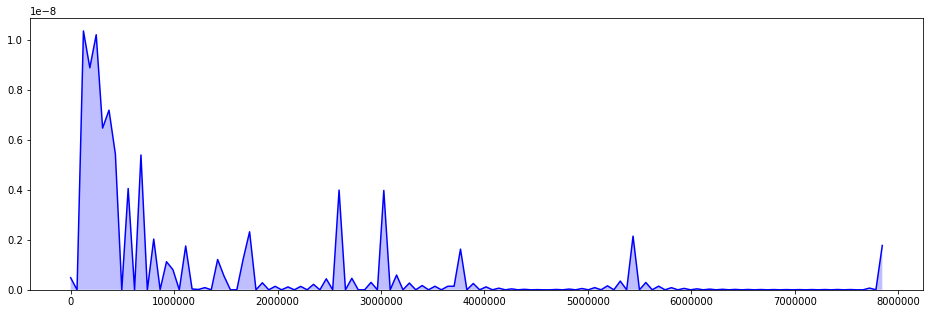

In [96]:
fig = plt.figure(figsize=(16,5))
sns.kdeplot(df['num_user_followers'],shade=True,color="b",legend=False)

### We can see that non-verified users (red) have on average much lesser number of followers than verified users (blue).

,count,mean,std,min,25%,50%,75%,max
is_verified,,,,,,,,
not_verified,10309.0,1176.021632,7030.663970,0.0,18.0,97.0,480.0,351581.0
verified,191.0,255837.554974,854951.020319,591.0,6114.0,21603.0,93382.5,7846488.0


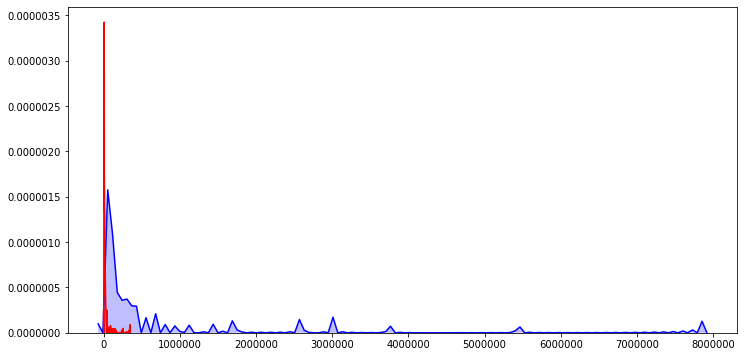

In [99]:
fig = plt.figure(figsize=(12,6))
sns.kdeplot(df.loc[(df["is_verified"]=="verified")]['num_user_followers'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["is_verified"]=="not_verified")]['num_user_followers'],shade=True,color='r',legend=False)
df.groupby("is_verified")["num_user_followers"].describe()

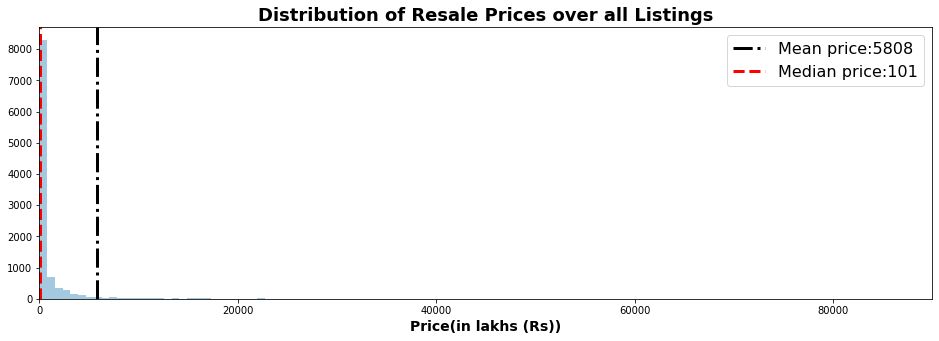

In [128]:
# look at price distribution
fig = plt.figure(figsize=(16,5))
ax = fig.gca()
col=df['num_user_followers']
sns.distplot(col,kde=False,bins=10000)
plt.xlabel('Price(in lakhs (Rs))',fontsize=14,fontweight="bold")
plt.axvline(col.mean(),lw=3,ls='dashdot',
            color='black',label='Mean price:'+'{0:.0f}'.format(np.mean(col)))
plt.axvline(col.median(),lw=3,ls='dashed',
            color='red',label='Median price:'+'{0:.0f}'.format(np.median(col)))
plt.title('Distribution of Resale Prices over all Listings',fontsize=18,fontweight="bold")
plt.legend(loc='upper right',fontsize=16)
plt.xlim(-1,90000)
plt.show()

# Number of likes trend

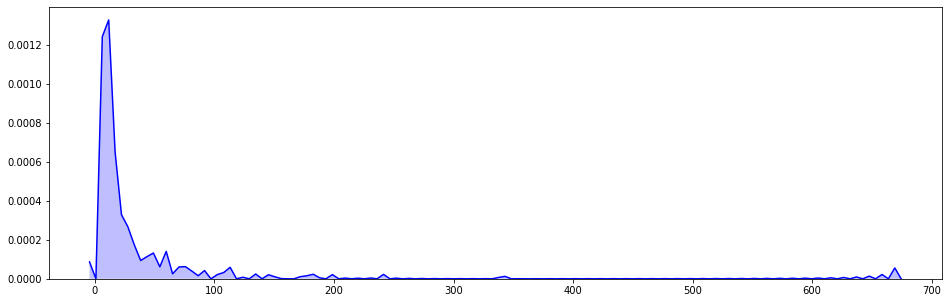

In [100]:
fig = plt.figure(figsize=(16,5))
sns.kdeplot(df['num_likes'],shade=True,color="b",legend=False,bw=1.5)

### We can see that non-verified users (red) have on average much lesser number of likes on the tweets than verified users (blue).

,count,mean,std,min,25%,50%,75%,max
is_verified,,,,,,,,
not_verified,10309.0,0.800757,8.626609,0.0,0.0,0.0,0.0,670.0
verified,191.0,20.994764,36.857977,0.0,1.0,6.0,21.5,198.0


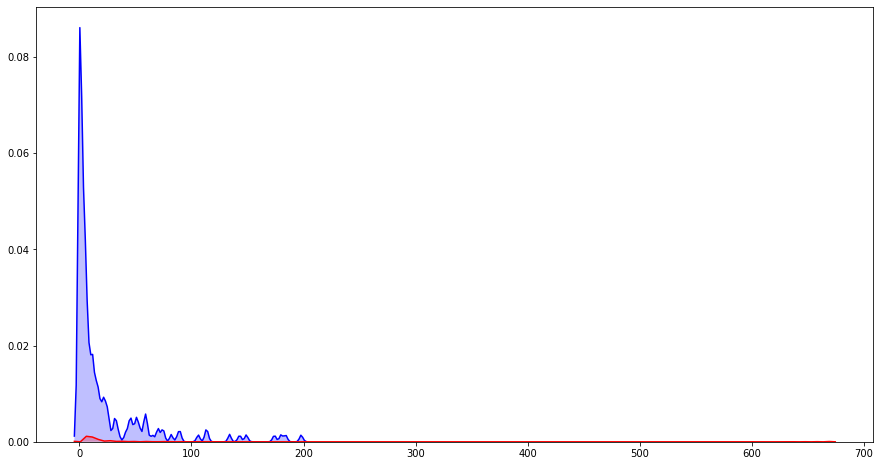

In [102]:
fig = plt.figure(figsize=(15,8))
sns.kdeplot(df.loc[(df["is_verified"]=="verified")]['num_likes'],shade=True,color="b",legend=False,bw=1.5)
sns.kdeplot(df.loc[(df["is_verified"]=="not_verified")]['num_likes'],shade=True,color='r',legend=False,bw=1.5)
df.groupby("is_verified")["num_likes"].describe()

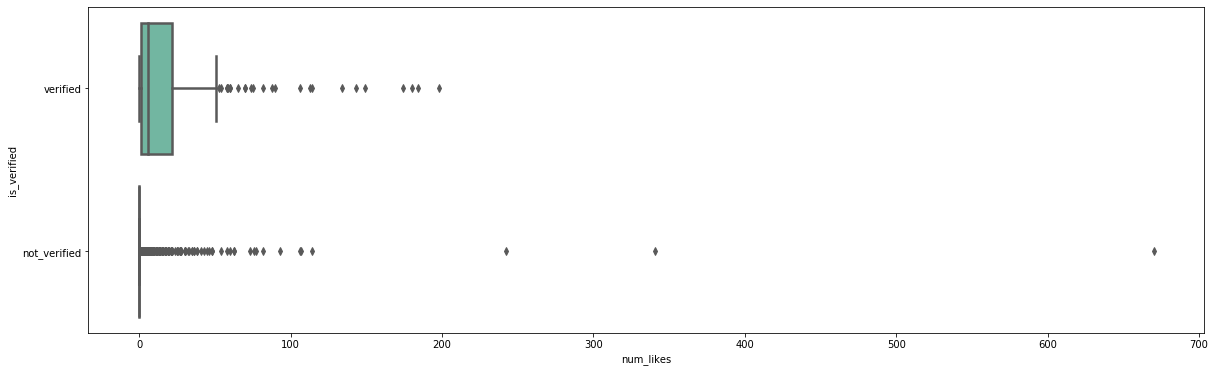

In [103]:
fig = plt.figure(figsize=(20,6))
sns.boxplot(x="num_likes",y="is_verified",data=df,linewidth=2.5,palette="Set2")

# Number of retweets trend

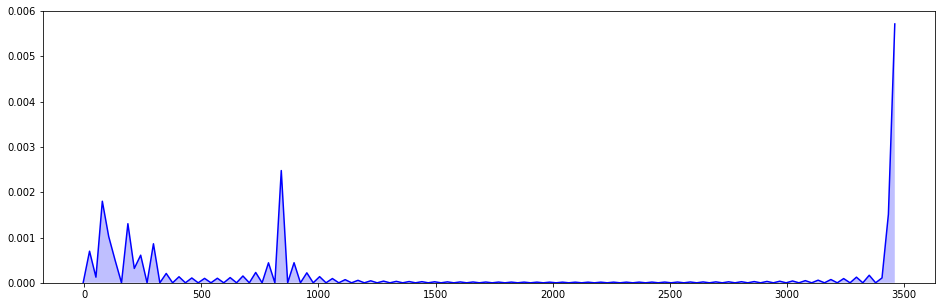

In [104]:
fig = plt.figure(figsize=(16,5))
sns.kdeplot(df['num_retweets'],shade=True,color="b",legend=False,bw=1.5)

## The retweets for tweets by non-verified users (seem higher) but this is misleading as let's say a non-verified (and hence, likely an unpopular user) retweets a tweet by the Prime Minister (where the original tweet by the PM itself has 1M retweets), the retweet by the non-verified user inherits the retweet count of the PM's original tweet and hence, no valid conclusions regarding retweets can be extracted.

,count,mean,std,min,25%,50%,75%,max
is_verified,,,,,,,,
not_verified,10309.0,667.336114,1291.433412,0.0,1.0,14.0,205.0,3456.0
verified,191.0,34.209424,252.524846,0.0,1.0,3.0,12.5,3455.0


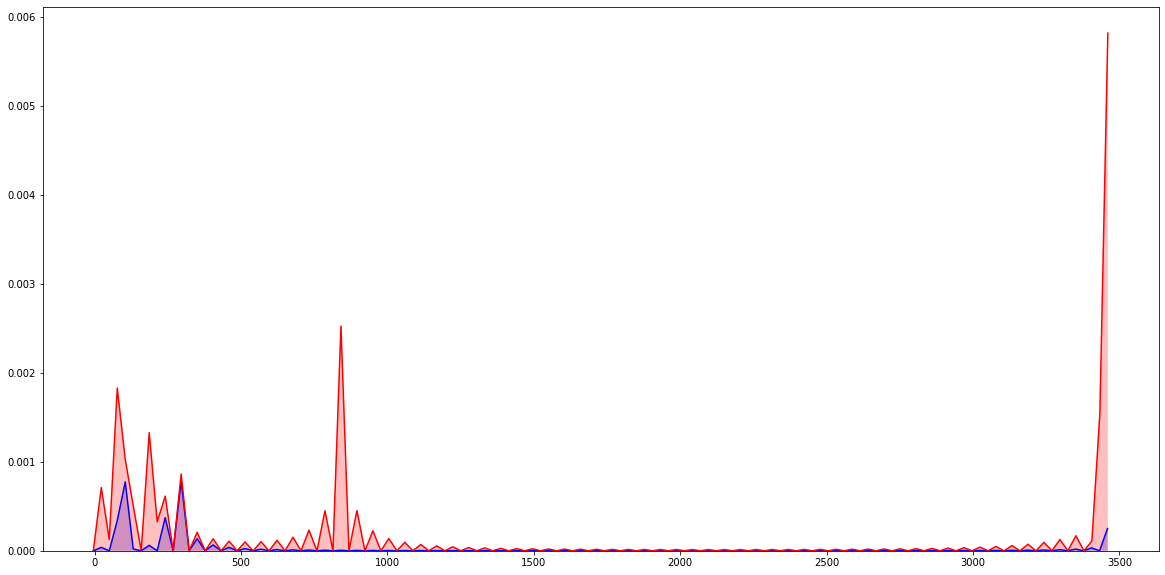

In [105]:
fig = plt.figure(figsize=(20,10))
sns.kdeplot(df.loc[(df["is_verified"]=="verified")]['num_retweets'],shade=True,color="b",legend=False,bw=1.5)
sns.kdeplot(df.loc[(df["is_verified"]=="not_verified")]['num_retweets'],shade=True,color='r',legend=False,bw=1.5)
df.groupby("is_verified")["num_retweets"].describe()

# Language in which tweets were tweeted
### Most of the tweets were in English and hindi but many languages (tweets were observed from all over the country) had their little contributions

In [110]:
df['lang'].value_counts()

en     7209
hi     1698
und    1188
mr      110
in       71
te       54
ta       54
kn       45
gu       17
bn       15
et        8
cy        6
ht        5
es        4
pt        3
tl        3
is        2
it        2
ml        2
fr        1
ja        1
pa        1
lv        1
Name: lang, dtype: int64

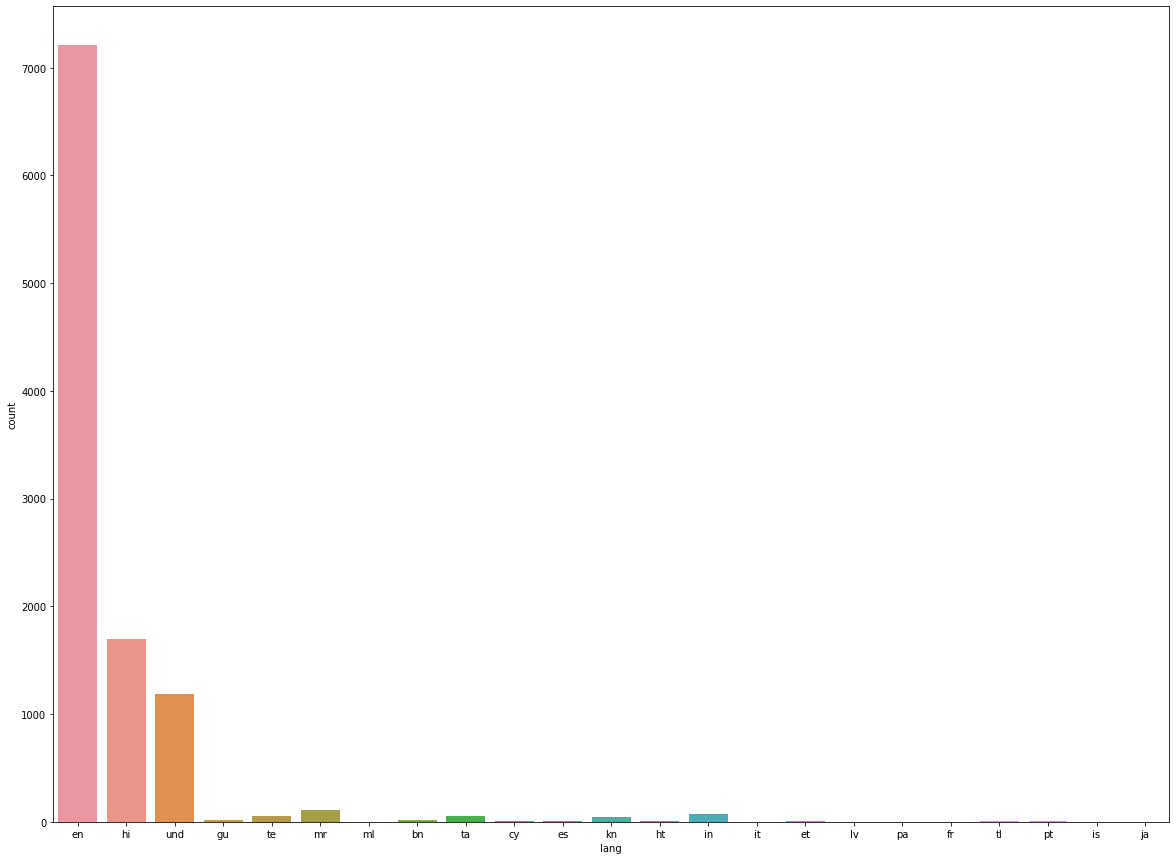

In [114]:
fig = plt.figure(figsize=(20,15))
sns.countplot(x="lang", data=df)

# Number of external links provided
### The proportion of tweets having links is higher than usual. This seems to be due to 'news channels, trivia accounts' etc providing links to their individual articles on Ramanujan and National Mathematics Day.

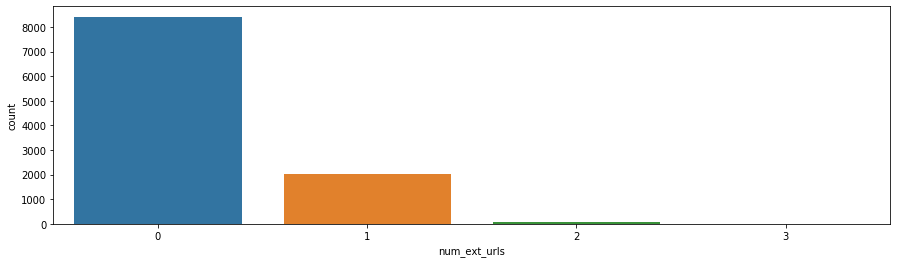

In [123]:
#The purpose of using plt.figure() is to create a figure object.
fig = plt.figure(figsize=(15,4))
sns.countplot(x="num_ext_urls", data=df)

# Number of images attached with tweets
### Again, the number of tweets having an attached image seems higher than the usual case.

In [126]:
df["num_ext_media"].value_counts()

0    9312
1    1188
Name: num_ext_media, dtype: int64

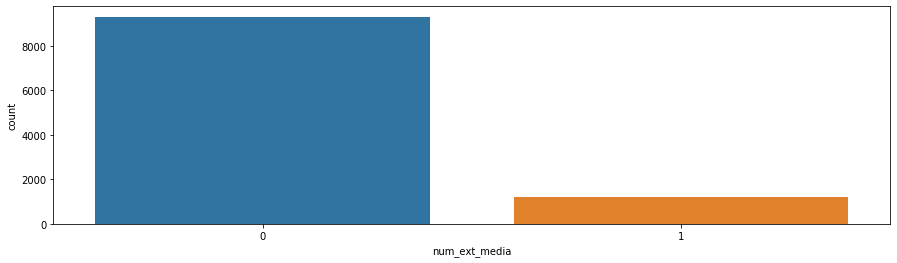

In [125]:
#The purpose of using plt.figure() is to create a figure object.
fig = plt.figure(figsize=(15,4))
sns.countplot(x="num_ext_media", data=df)

# Correlation between likes and number of followers
### We see that there is a decent correlation between number of followers and likes garenered by the tweet.

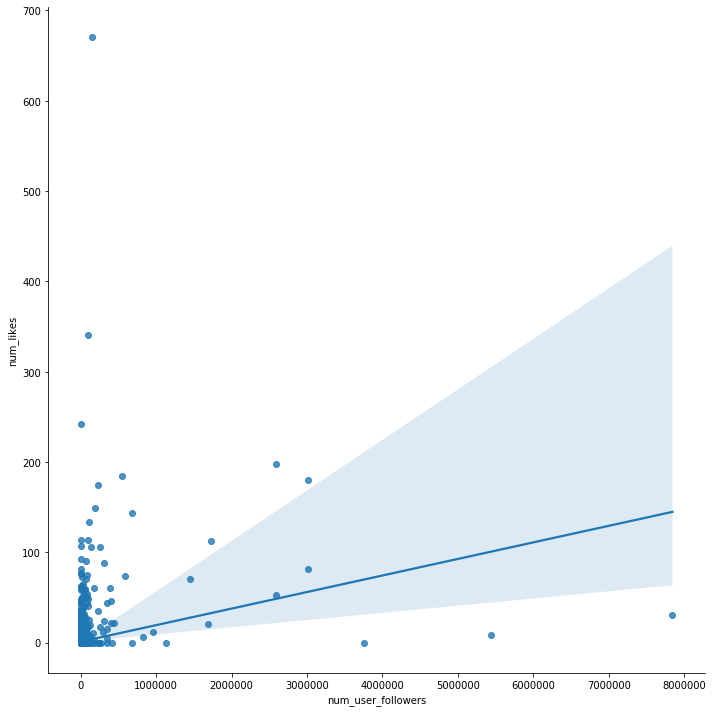

In [135]:
sns.lmplot('num_user_followers','num_likes',data=df,order=1,scatter=True,height=10,aspect=1)

# Number of connected components (Failed attempt due to failed authentication :( )

In [ ]:
user_id_list

In [ ]:
list_set = set(user_id_list) 
# convert the set to the list 
user_id_list = (list(list_set)) 

In [ ]:
def is_connected(num1,num2):
    a_headers = {
    'Authorization': 'Bearer {}'.format(access_token)
    }

    paramsa = {

        'source_id': num1,
        'target_id': num2,
        'source_screen_name':user_map[num1],
        'target_screen_name':user_map[num2]
        
        
    }
    import requests 
    from requests.auth import HTTPBasicAuth 
  
    print(paramsa)
    # https://developer.twitter.com/en/docs/twitter-api/v1/accounts-and-users/follow-search-get-users/api-reference/get-friendships-show
    url = 'https://api.twitter.com/1.1/friendships/lookup.json'  
    resp = requests.get(url, headers=a_headers, params=paramsa,auth = HTTPBasicAuth('anmolagarwal999', '5'))
    rel=resp.json()
    print(rel)
    if rel["source"]["following"]==True or rel["source"]["followed_by"]==True:
        return True
    if rel["target"]["following"]==True or rel["target"]["followed_by"]==True:
        return True
    return False

In [ ]:
len(user_id_list)

In [ ]:
adj={}
for i in range(0,len(user_id_list)):
    adj[user_id_list[i]]=[]
    
for i in range(0,len(user_id_list)):
    num1=user_id_list[i]    
    for j in range(i+1,len(user_id_list)):
        num2=user_id_list[j]
        if is_connected(num1,num2)==True:
            adj[num1].append(num2)
            adj[num2].append(num1)
            

In [ ]:
""